# Unsupervised Learning - K-Means Clustering

In [3]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_cust = pd.read_csv('Mall_Customers.csv')

In [5]:
df_cust.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,117,Female,63,65,43
8,9,Male,64,19,3
189,190,Female,36,103,85
81,82,Male,38,54,55
40,41,Female,65,38,35


`Spending Score (1-100)`: low spends (1) to higher spends (100)

In [7]:
df_cust.shape

(200, 5)

In [8]:
from sklearn.cluster import KMeans

In [9]:
df_cust.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
select_cols = ['Age','Spending Score (1-100)']

In [11]:
df_cust[select_cols]

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


### Let us plot a scatter plot

In [13]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [14]:
plt.style.use('ggplot')

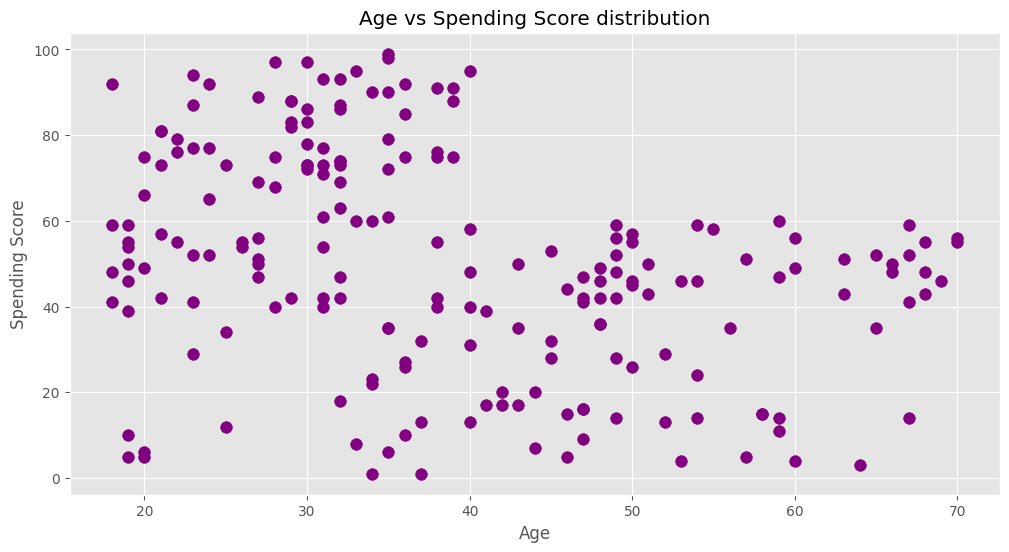

In [15]:
plt.subplots(figsize = (12,6))

plt.scatter(x='Age', y='Spending Score (1-100)', data=df_cust, color='purple', s=70)
plt.title("Age vs Spending Score distribution")
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

### Deciding the `K-value`

`elbow chart`

- To decide the k-value, we use `elbow chart technique` to determine the optimal number of clusters in K-Means clustering
- It plots cost function produced by different k values
- As k increases, `average distortion/variance will decrease`

### Get 2-D array

In [20]:
elbow = df_cust[['Age', 'Spending Score (1-100)']].iloc[:,:].values #to get the 2-D array

In [21]:
elbow

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [22]:
inertia = [] #create an empty list

In [23]:
list(range(1,11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [24]:
for n in range(1,11):
    algo = KMeans(n_clusters=n, init='k-means++', max_iter=300,tol=0.0001, random_state=45, algorithm='elkan')
    algo.fit(elbow)
    inertia.append(algo.inertia_)

`elkan`: it is an optimization technique for the K-Means clustering which helps to accelerate the convergence of K-means algorithm

`init`: defines the method used to initialize the cluster centroids - k-means++ or random. K-means++ is preferred as it selects initial centroids in such a way that speeds up the convergence of the algorithm

`inertia_`: within-cluster sum of squares (WCCS) - is a metric used to evaluate the goodness of fit of clustering algo.

`tol`: the tolerance for convergence of the algorithm. https://en.wikipedia.org/wiki/Shishupala


In [26]:
inertia

[171535.5,
 75949.15601023019,
 45844.53681626929,
 28165.58356662934,
 23954.645994076847,
 20026.014430364303,
 18454.34760348584,
 13234.00591025462,
 11516.2137721299,
 10444.42037836808]

### Plot the elbow chart

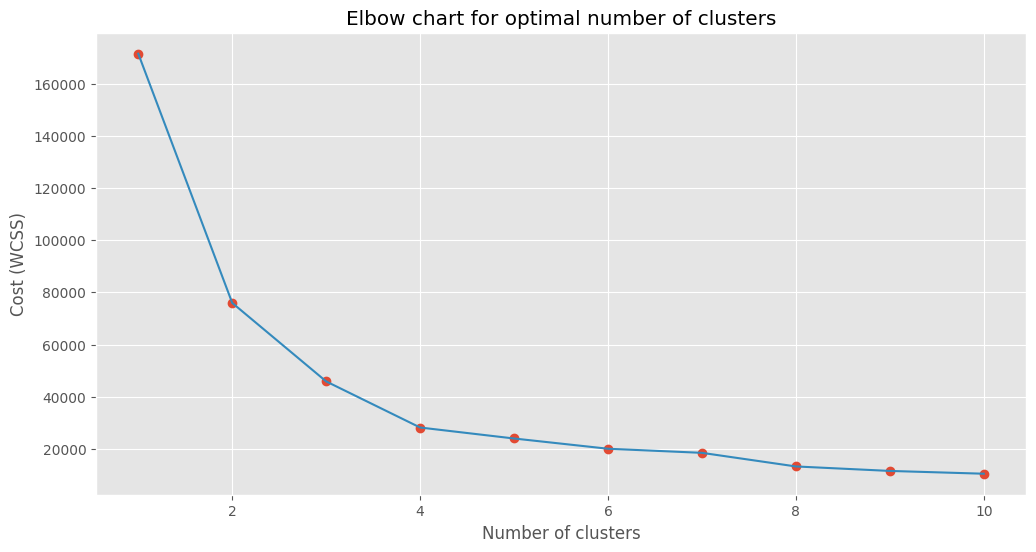

In [28]:
plt.subplots(figsize=(12,6))


plt.plot(np.arange(1,11), inertia, 'o') #align with no. of clusters
plt.plot(np.arange(1,11), inertia, )
plt.title('Elbow chart for optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Cost (WCSS)')
plt.show()

### Let us start with `K=3`

#### Create `K-Means` object

In [31]:
algo_3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, tol=0.0001, random_state=45, algorithm='elkan')

#### Run `K-Means`clustering

In [33]:
algo_3.fit(elbow) #running the model

KMeans(algorithm='elkan', n_clusters=3, random_state=45)

In [34]:
centroids_1 = algo_3.cluster_centers_

In [35]:
centroids_1

array([[29.56451613, 80.74193548],
       [43.02173913, 14.23913043],
       [43.02173913, 47.59782609]])

In [36]:
labels_1 = algo_3.labels_

In [37]:
labels_1

array([2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [38]:
elbow.shape

(200, 2)

In [39]:
labels_1.shape

(200,)

In [40]:
df_cust = pd.DataFrame(elbow, columns=['Age', 'Spending Score'])

In [41]:
df_cluster_labels = pd.DataFrame(labels_1, columns=['Cluster_Number'])

In [42]:
result= pd.concat([df_cust,df_cluster_labels], axis=1)

In [43]:
result.head(5)

,Age,Spending Score,Cluster_Number
0,19,39,2
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,2


In [44]:
result['Cluster_Number'].value_counts()

Cluster_Number
2    92
0    62
1    46
Name: count, dtype: int64

### Plot for clusters = 3

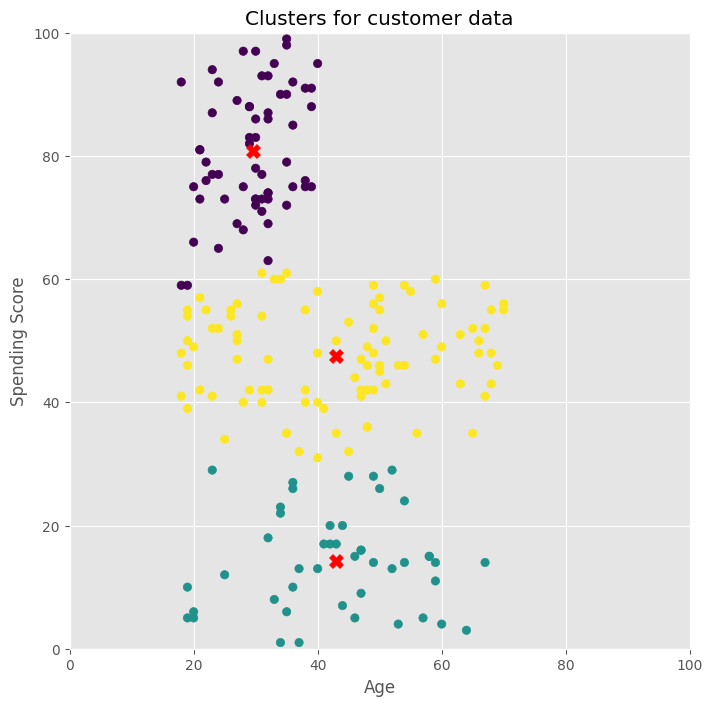

In [46]:
plt.subplots(figsize=(8,8))
plt.scatter(elbow[:,0], elbow[:,1], c=labels_1, cmap='viridis')
plt.scatter(centroids_1[:,0],centroids_1[:,1], marker='X', color='red', s=100)
plt.title("Clusters for customer data")
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

# `PLOT SCALE IS REALLY A CRITICAL ANGLE`

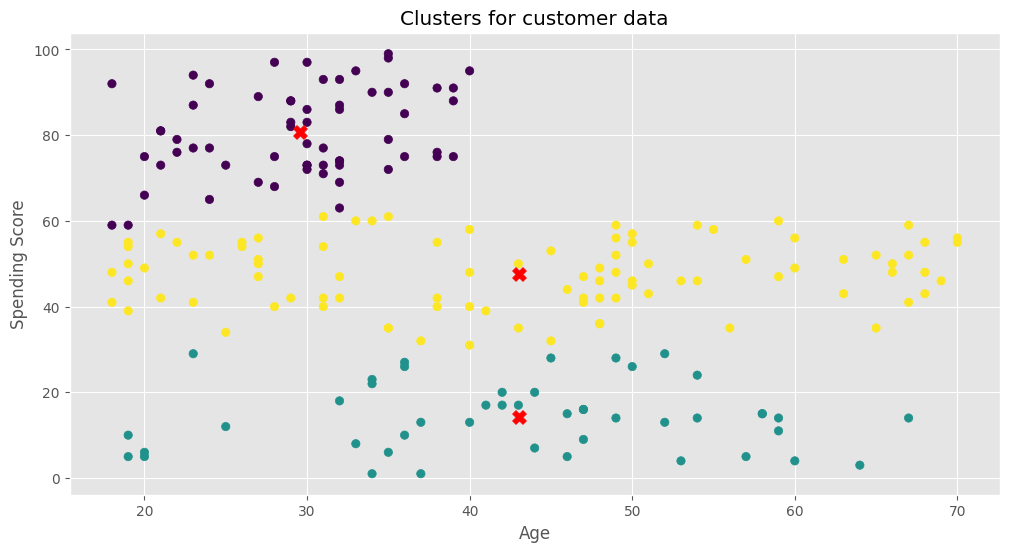

In [48]:
plt.subplots(figsize=(12,6))
plt.scatter(elbow[:,0], elbow[:,1], c=labels_1, cmap='viridis')
plt.scatter(centroids_1[:,0],centroids_1[:,1], marker='X', color='red', s=100)
plt.title("Clusters for customer data")
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

### For Clusters = 4

In [50]:
algo_4 = KMeans(n_clusters=4, init='random', max_iter=500, tol=0.0001, random_state=45, algorithm='elkan')

In [51]:
algo_4.fit(elbow) #running the model

KMeans(algorithm='elkan', init='random', max_iter=500, n_clusters=4,
       random_state=45)

In [52]:
centroids_1 = algo_4.cluster_centers_
centroids_1

array([[55.70833333, 48.22916667],
       [27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333]])

In [53]:
labels_1 = algo_4.labels_
labels_1

array([1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 1, 3, 2, 1, 2,
       3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 0, 1,
       3, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [54]:
df_cust = pd.DataFrame(elbow, columns=['Age', 'Spending Score'])

In [55]:
df_cluster_labels = pd.DataFrame(labels_1, columns=['Cluster_Number'])

In [56]:
result= pd.concat([df_cust,df_cluster_labels], axis=1)
result

,Age,Spending Score,Cluster_Number
0,19,39,1
1,21,81,2
2,20,6,3
3,23,77,2
4,31,40,1
...,...,...,...
195,35,79,2
196,45,28,3
197,32,74,2
198,32,18,3


### Plot for clusters = 4

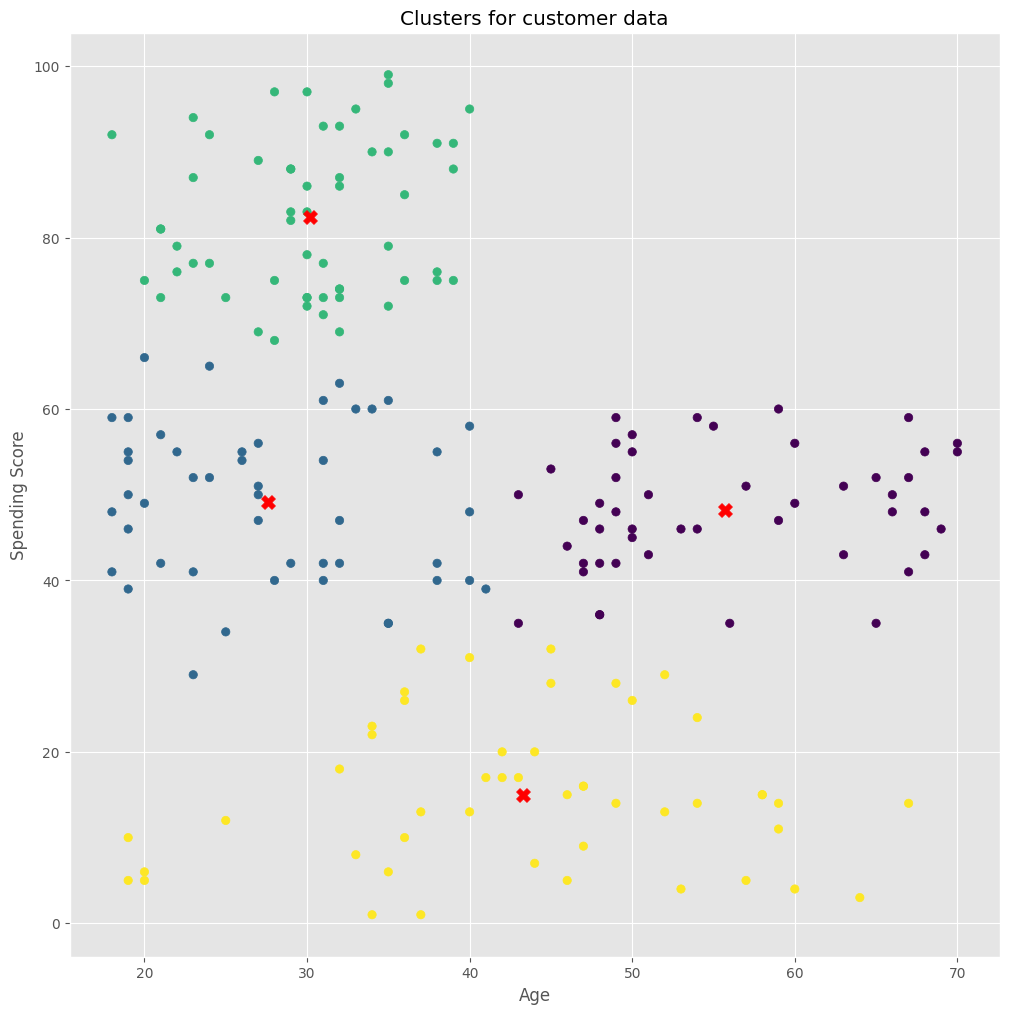

In [58]:
plt.subplots(figsize=(12,12))
plt.scatter(result['Age'], result['Spending Score'], c=result['Cluster_Number'], cmap='viridis')
plt.scatter(centroids_1[:,0],centroids_1[:,1], marker='X', color='red', s=100)
plt.title("Clusters for customer data")
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

# Conclusion
Using the k-means clustering we have managed to form clusters based on Age. Mall management can target the clusters with average spending score to increase their profit and should also maintain good relationship with premium customers with high spending score.They should also work on coming up with new innovative ideas to upgrade the customers with low spending score.